In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix


In [4]:
mist = fetch_openml('mnist_784',version=1,as_frame=False)

In [6]:
X,y=mist.data,mist.target
print(f"Shape of X: {X.shape}")
print(f"Shape of y:{y.shape}")

Shape of X: (70000, 784)
Shape of y:(70000,)


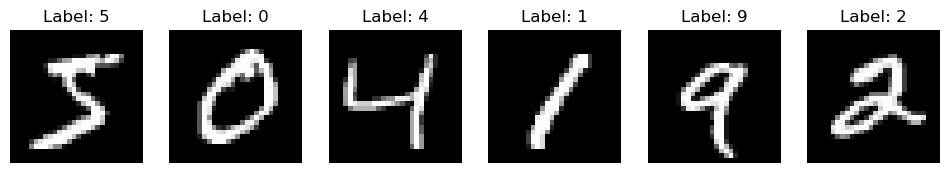

In [7]:
fig, axes = plt.subplots(1, 6, figsize=(12, 5))
for i, ax in enumerate(axes):
    ax.imshow(X[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title(f"Label: {y[i]}")
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (56000, 784)
Test set size: (14000, 784)


In [9]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

model.fit(X_train, y_train)

print("Model training is completed.")

Model training complete.


In [10]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.73%


In [11]:
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.98      0.98      0.98      1600
           2       0.95      0.97      0.96      1380
           3       0.96      0.95      0.96      1433
           4       0.96      0.97      0.97      1295
           5       0.97      0.96      0.97      1273
           6       0.98      0.98      0.98      1396
           7       0.97      0.97      0.97      1503
           8       0.96      0.95      0.96      1357
           9       0.96      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.97      0.97     14000
weighted avg       0.97      0.97      0.97     14000

Confusion Matrix:
 [[1325    0    4    0    1    1    3    1    6    2]
 [   0 1573    6    8    2    0    0    6    3    2]
 [   4    5 1334    4    5    1    9    8    8    2]
 [   1    0   23 1366    0    9    0   

In [13]:
import joblib
joblib.dump(model, "mnist_model.pkl")
print("Model saved ")
loaded_model = joblib.load("mnist_model.pkl")
print("Model Loaded")

Model saved 
Model Loaded


In [15]:
y_loaded_pred=loaded_model.predict(X_test)
loaded_acuracy=accuracy_score(y_test,y_loaded_pred)
print(f"Loaded Model Accuracy:{loaded_acuracy*100:.2f}%")

Loaded Model Accuracy:96.73%
